Created by: Aslamic Adika

In [1]:
# import some needed libraries 

import numpy as np
import pandas as pd
import datetime
from datetime import datetime
from pandas.core.tools.datetimes import to_datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Hiding the warnings
import warnings
warnings.filterwarnings('ignore') 
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
%matplotlib inline

# Dataset

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

In [2]:
sheet_url  = 'https://docs.google.com/spreadsheets/d/1oNePPFiwo6LZe37tTnBWVOmWD707bn5Miy3BXSLXfPk/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)

In [3]:
df.head(2)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.730
1,1,Medium,1,4,3,2,35.670


## Dataset library:
1. MarketID         : Unique identifier for market
2. MarketSize       : Size of market area by sales
3. LocationID       : Unique identifier for store location
4. AgeOfStore       : Age of store in years
5. Promotion        : One of three promotions that were tested
6. Week             : One of four weeks when the promotions were run
7. SalesInThousands : Sales amount for a specific LocationID, Promotion, and week  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [5]:
df.shape

(548, 7)

<AxesSubplot:>

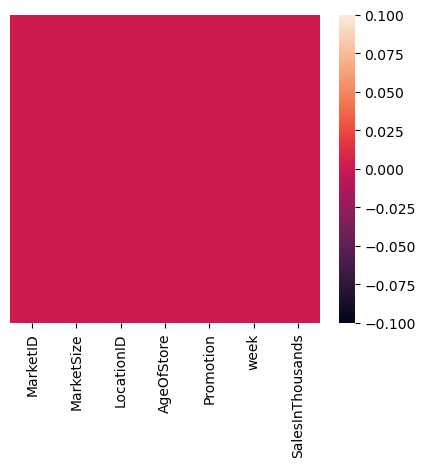

In [6]:
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull(), yticklabels = False)

In [7]:
for i in df.columns:
    print(f'column {i} :', df[i].unique())
    print('____________________________________________________________________________________________________')

column MarketID : [ 1  2  3  4  5  6  7  8  9 10]
____________________________________________________________________________________________________
column MarketSize : ['Medium' 'Small' 'Large']
____________________________________________________________________________________________________
column LocationID : [  1   2   3   4   5   6   7   8   9  10  11  12  13 101 102 103 104 105
 106 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 301 302 303 304 305 306 307 308 309 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 601 602 603 604 605 606 607 608 609 610
 611 612 613 614 615 701 702 703 704 705 706 707 708 709 710 711 712 801
 802 803 804 805 806 807 808 809 810 901 902 903 904 905 906 907 908 909
 910 911 912 913 914 915 916 917 918 919 920]
____________________________________________________________________________________________________
column AgeOfStore : [ 4

In [8]:
df.head(3)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.730
1,1,Medium,1,4,3,2,35.670
2,1,Medium,1,4,3,3,29.030


## Promotion/campaign effect on sales

In [9]:
# check for total sales for each promotion

total_sales_camp = df.groupby('Promotion')['SalesInThousands'].describe() 
total_sales_camp 

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.000,58.099,16.554,30.810,46.353,55.385,63.617,99.650
2,188.000,47.329,15.109,17.340,38.170,45.385,51.745,88.640
3,188.000,55.364,16.766,22.180,44.198,51.165,61.733,96.480


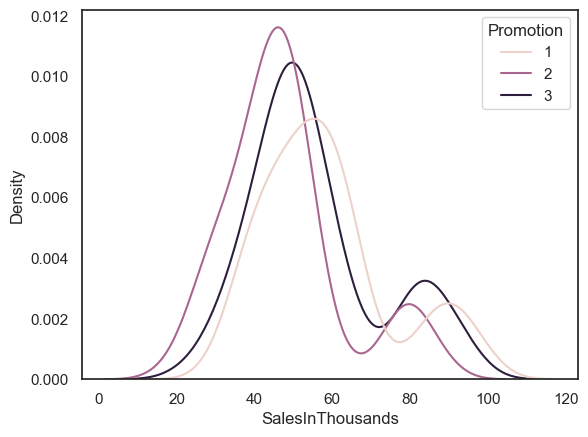

In [77]:
sns.kdeplot(df.SalesInThousands, hue=df.Promotion)
plt.show()

From distribution of Sales, it seems that there are two kind of normal distribution for each promotion campaign: 
 1. Sales between $0-75$ 
 2. Sales between $75-115$

- Promotion number 3 brought greatest sales and total sold.

## Hypothesis testing for two populations

There are different total and average sales for promotions 1 and 2, but we are not sure both statistically different. $\\$
Hence we need to test them with z-test for two independent population. $\\$ $\\$

$z = \frac{(\bar{x}_i - \bar{x}_j)-([H_0])}{\sqrt{\frac{s_i^2}{n_i}+\frac{s_i^2}{n_i}}}$

In [63]:
# select data for each promotion

prom1 = df.where(df.Promotion == 1).dropna(subset = 'Promotion')[['Promotion','SalesInThousands']]
prom2 = df.where(df.Promotion == 2).dropna(subset = 'Promotion')[['Promotion','SalesInThousands']]
prom3 = df.where(df.Promotion == 3).dropna(subset = 'Promotion')[['Promotion','SalesInThousands']]

In [64]:
# chose sample randomly 40% of them
sampel_1 = prom1.iloc[:,1].sample(frac=0.4)
sampel_2 = prom2.iloc[:,1].sample(frac=0.4)
sampel_3 = prom3.iloc[:,1].sample(frac=0.4)

<AxesSubplot:xlabel='SalesInThousands', ylabel='Density'>

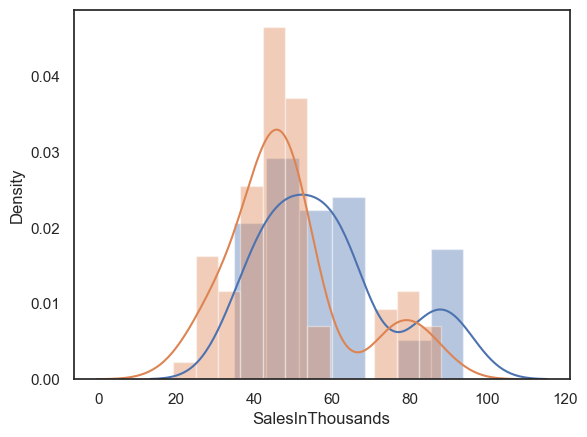

In [80]:
sns.distplot(sampel_1)
sns.distplot(sampel_2)

In [57]:
sampel_1.describe()

count   69.000
mean    59.086
std     17.758
min     32.050
25%     47.500
50%     55.110
75%     63.730
max     99.650
Name: SalesInThousands, dtype: float64

Hypothesis: $\\$ $\\$

$H_0: \bar{x}_2 - \bar{x}_1 \leq 0$ $\\$ 
$H_1: \bar{x}_1 > \bar{x}_2$ $\\$ 

In [13]:
#z-test for two independent population one tail with \alpha = 5%
#created by AAdika45

# a code of standard deviation by definition
def std_sampel(data):
    sigma = 0
    if len(data) == 0:
        print('There is no data')
        pass
    else:
        avg = data.mean()
        for i in data:
            sigma += (i - avg)**2
            std = np.sqrt(sigma/len(data)-1)
    std = float("{:.3f}".format(std))
    return std

def z_test_twoPop(data1,data2):
    zeta = data1.mean() - data2.mean()
    omega = std_sampel(data1)**2/len(data1) + std_sampel(data2)**2/len(data2) 
    gamma = np.sqrt(omega)
    z = zeta/gamma
    if  z > 1.645: #change condition if you need two tails test, then the condition must (\alpha = 5%): z<1.645 or z>1.645
        print(f'Hypothesis H_0 is rejected!')
    else:
        print(f'Hypothesis H_0 is failed to be rejected!')
    return

In [14]:
z_test_twoPop(sampel_1,sampel_2)

Hypothesis H_0 is rejected!


H_0 is rejected. We 95% confidently say that promotion 1 has bigger average sales than promotion 2!

## Total sold and sales for each market size

In [15]:
## check for total sales for each marketsize

total_sales_marks = df.groupby('MarketSize')['SalesInThousands'].describe() 
total_sales_marks

,count,mean,std,min,25%,50%,75%,max
MarketSize,,,,,,,,
Large,168.000,70.117,17.052,39.360,53.622,75.020,84.532,99.650
Medium,320.000,43.985,9.051,17.340,37.922,44.590,50.345,65.110
Small,60.000,57.409,6.633,36.170,53.343,57.555,62.160,70.600


- Large market type has greatest average sales with total sold of 168.

In [16]:
df.groupby(['Promotion']).agg({
    'Promotion':'count',
    'SalesInThousands':['sum','mean','std']
})

Promotion SalesInThousands              
              count              sum   mean    std
Promotion                                         
1               172         9993.030 58.099 16.554
2               188         8897.930 47.329 15.109
3               188        10408.520 55.364 16.766

In [17]:
df.groupby(['MarketSize']).agg({
    'Promotion':'count',
    'SalesInThousands':['sum','mean','std']
})

Promotion SalesInThousands              
               count              sum   mean    std
MarketSize                                         
Large            168        11779.610 70.117 17.052
Medium           320        14075.310 43.985  9.051
Small             60         3444.560 57.409  6.633

From the table above, we use ANOVA (Analysis of Variance) to see the relation each Marketsize vs Promotion

## ANOVA (Analysis of Variance)

We want to see how Promotion or MarketSize effect on Sales. Since there are two factors of interest: Promotion and Market Size, hence we are going to perform ANOVA two ways.

Hypothesis:
1) $H_0$ : Promotion does not effect on total sales
2) $H_0$ : Market Size does not effect on total sales
3) $H_0$ : There is no interaction effect both Promotion and MarketSize on total sales 

In [18]:
anv = df[['MarketSize','Promotion','SalesInThousands']].sort_values(by = 'MarketSize')
anv

,MarketSize,Promotion,SalesInThousands
547,Large,2,49.410
107,Large,3,81.720
108,Large,1,93.710
109,Large,1,96.010
110,Large,1,93.030
...,...,...,...
62,Small,3,70.600
63,Small,3,65.060
64,Small,3,59.760
66,Small,3,62.160


In [19]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [20]:
formula = 'SalesInThousands ~ C(MarketSize) + C(Promotion) +C(MarketSize):C(Promotion)'

In [21]:
test = ols(formula,anv).fit()
anova_2 = anova_lm(test,typ=2)
anova_2

,sum_sq,df,F,PR(>F)
C(MarketSize),77803.042,2.000,337.136,0.000
C(Promotion),12979.271,2.000,56.242,0.000
C(MarketSize):C(Promotion),2116.740,4.000,4.586,0.001
Residual,62194.324,539.000,NaN,NaN


From the table above, we have evidence that:
- Market Size does effect on total sales
- Promotion does effect on total sales
- There is interaction effect (Promotion and MarketSize) on total sales;

## Machine Learning Tools


We investigate relation between age of store or Market size to Sales. Age of store is continues data, but Market Size is categorical data. Prepare the data and transform categorical data to numeric

In [30]:
regression = df[['MarketSize','AgeOfStore','SalesInThousands']]

In [31]:
# import machine learning library 

import sklearn
from sklearn.preprocessing import LabelEncoder

In [32]:
Le = LabelEncoder()
regression['MarketSize'] = Le.fit_transform(regression['MarketSize'])


### Correlation Matrix

Correlation Matrix is a matrix that contain a correlation value (linearly) between two variables. Correlation, $r$, between two variables defined as $\\$

$ r = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n(x_i - \bar{x})^2(y_i - \bar{y})^2}}$, $\\$

where $r>0$ is positively correlated; $r<0$ is negatively correlated; $-1\leq r\leq 1$.

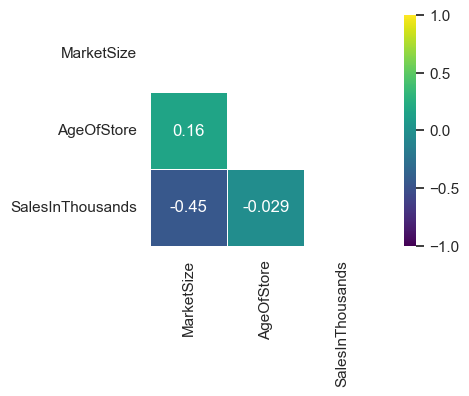

In [33]:
plt.figure(figsize=(6,3))
sns.set_theme(style="white")
corr = regression.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, annot=True,vmin =-1, vmax=1, center=0,
            square=True, linewidths=.5, cmap = 'viridis')
plt.show()

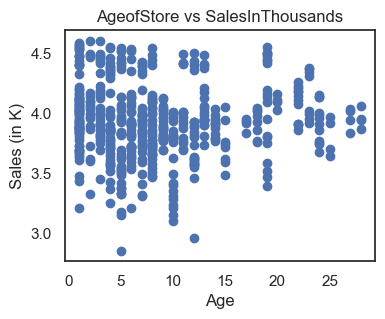

In [34]:
plt.figure(figsize=(4,3))
plt.scatter(regression.AgeOfStore, np.log(regression.SalesInThousands))
plt.title('AgeofStore vs SalesInThousands')
plt.xlabel('Age')
plt.ylabel('Sales (in K)')
plt.show()

AgeofStore vs SalesInThousands scatter plots are not linearly distributed, and it's also shown at a correlation value of -0.03.
Therefore, it is unnecessary to make linear regression between AgeofStore and SalesInThousands (the data more like area between two damped waves function: http://hyperphysics.phy-astr.gsu.edu/hbase/oscda.html) $\\$

To explain how the data is distributed is with one of the methods in numerical analysis (a powerful methods in physics to describe experiment data), which is not going to do for this time.

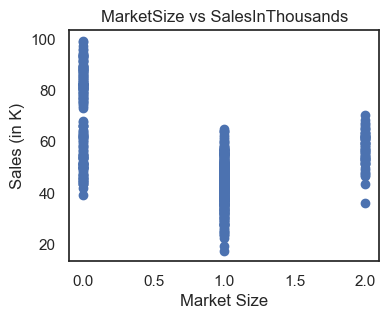

In [35]:
plt.figure(figsize=(4,3))
plt.scatter(regression.MarketSize, regression.SalesInThousands)
plt.xlabel('Market Size')
plt.ylabel('Sales (in K)')
plt.title('MarketSize vs SalesInThousands')
plt.show()

The distribution is expected, consider the x-axis is categorical data

From the correlation matrix, it is shown that the data is not linearly distributed. But, for our portfolio, we will show you the logistic model for three variables: AgeofStore, SalesInThousands, and MarketSize. $\\$

We will also compare to another machine learning method: K-Nearest Neighbor (KNN), as it is a classification method for non-linearly distributed data.

### Logistic Regression

Logistic regression is a regression to make a model of a dataset logistically distributed. The idea is to find the likelihood of two categorical data (yes or no; True or False; etc.), but it's also used for more than two categorical data, known as multi-class logistic regression. Logistic regression comprehensive explanation can be found in your favourite statistics books.

In [36]:
# import split and train data

from sklearn.model_selection import train_test_split

In [37]:
regression.head(3)

,MarketSize,AgeOfStore,SalesInThousands
0,1,4,33.730
1,1,4,35.670
2,1,4,29.030


In [38]:
# prepare train and test data

X = regression.drop(columns=['MarketSize'])
y = regression[['MarketSize']]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# import logistics regression library

from sklearn.linear_model import LogisticRegression

In [40]:
# perform logistic regression

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X,y)

LogisticRegression(multi_class='multinomial')

In [41]:
y_predict = lr.predict(X_test)

In [42]:
# compare the predict and actual data

y_compare = y_test.copy()
y_compare['predict'] = y_predict
y_compare.head(5)

,MarketSize,predict
247,1,0
78,0,0
245,1,0
353,1,1
477,0,1


From the table result, first 5 data is not predicted well. Next, we look persentage of accuracy of the model.

In [43]:
# import model report

from sklearn.metrics import confusion_matrix, classification_report

In [44]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65        55
           1       0.76      0.91      0.83        88
           2       0.50      0.05      0.08        22

    accuracy                           0.72       165
   macro avg       0.63      0.54      0.52       165
weighted avg       0.69      0.72      0.67       165



Logistic regression has been permormed.

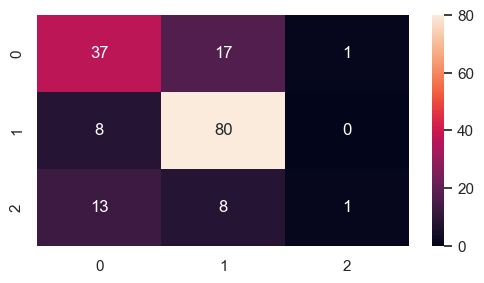

In [45]:
# import confusion matrix

plt.figure(figsize=(6,3))
sns.set_theme(style="white")
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

From the results of the confusion metric with logistic regression, it can be seen that the model can correctly predict the value of 37  0_marketsize, 80 1_marketsize and 1 2_marketsize.

### K-Nearest Neighbor (KNN)

In [46]:
# import knn package

from sklearn.neighbors import KNeighborsClassifier

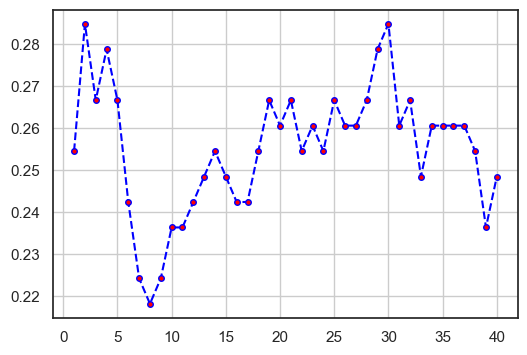

In [47]:
#elbow methods to find correct k value to optimize the model

from ftplib import error_reply
from tkinter import N

error_rate = []
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    predict_i = knn.predict(X_test)
    error_rate.append(np.mean(predict_i.reshape(165,1)!= y_test))
    
plt.figure(figsize=(6,4))
plt.plot(range(1,41), error_rate, color = 'blue', linestyle = '--', marker = 'o',
markerfacecolor = 'red', markersize = 4)
plt.grid()
plt.show()

Minimum value is between 5-10 therefore we chose one of them to be k at our knn model.

In [48]:
# To find exact optimum n of knn model
# Created by AAdika45

def KNN(data):
    for n in data:
            knn = KNeighborsClassifier(n_neighbors= n)
            knn.fit(X_train,y_train)
            predict = knn.predict(X_test)
            print('_____________________________________________________')
            print(f'for k = {n}')
            print(classification_report(y_test, predict))
    return
N = range(5,11)

KNN(N)

_____________________________________________________
for k = 5
              precision    recall  f1-score   support

           0       0.77      0.67      0.72        55
           1       0.79      0.84      0.81        88
           2       0.43      0.45      0.44        22

    accuracy                           0.73       165
   macro avg       0.66      0.66      0.66       165
weighted avg       0.73      0.73      0.73       165

_____________________________________________________
for k = 6
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        55
           1       0.83      0.84      0.84        88
           2       0.46      0.59      0.52        22

    accuracy                           0.76       165
   macro avg       0.70      0.71      0.70       165
weighted avg       0.77      0.76      0.76       165

_____________________________________________________
for k = 7
              precision    recall  f1-score   

From result above, n = 9 is the best result.

In [49]:
knn = KNeighborsClassifier(n_neighbors= 9 )
knn.fit(X_train,y_train)
predict = knn.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73        55
           1       0.81      0.90      0.85        88
           2       0.52      0.64      0.57        22

    accuracy                           0.78       165
   macro avg       0.73      0.72      0.72       165
weighted avg       0.79      0.78      0.77       165



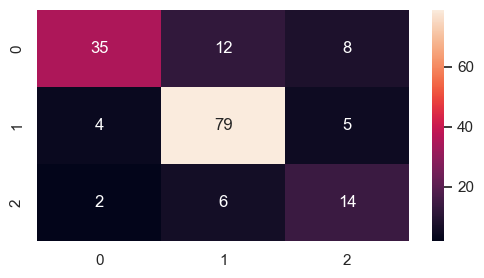

In [50]:
# confusion matrix

plt.figure(figsize=(6,3))
sns.set_theme(style="white")
sns.heatmap(confusion_matrix(y_test, predict), annot=True)
plt.show()

From the results of the confusion metric with knn methods, it can be seen that the model can correctly predict the value of 35  0_marketsize out of 55 data, 79 1_marketsize  out of 88 data and 14 2_marketsize out of 22 data.

### Multi-Class Logistic Regression vs KNN 

In [51]:
regression['MarketSize_String'] = Le.inverse_transform(regression['MarketSize'])

In [52]:
from sklearn.metrics import precision_recall_fscore_support

In [53]:
#we create classification_report score into an array

knn_prd = precision_recall_fscore_support(y_test, predict, labels= [0,1,2], average=None)
knn_prd = np.around(knn_prd, decimals=2)
knn_prd

array([[ 0.85,  0.81,  0.52],
       [ 0.64,  0.9 ,  0.64],
       [ 0.73,  0.85,  0.57],
       [55.  , 88.  , 22.  ]])

In [54]:
# Let's create table LR vs KNN
# created by AAdika45

knn1 = []
lr1 = []
for i in range(0,3):
    for j in range(0,3):
        if i != j:
            pass
        else:
            knn_predict = confusion_matrix(y_test, predict)
            lr_predict = confusion_matrix(y_test, y_predict)
            knn1.append(knn_predict[i,j])
            lr1.append(lr_predict[i,j])
            
lr_prd = precision_recall_fscore_support(y_test, y_predict, labels= [0,1,2], average=None)
lr_prd = np.around(lr_prd, decimals=3)
knn_prd = precision_recall_fscore_support(y_test, predict, labels= [0,1,2], average=None)
knn_prd = np.around(knn_prd, decimals=2)
prediksi = [knn1,lr1]
prediksi = np.array(prediksi)
dicti = {'correct_predict_knn':prediksi[0],'precision_knn':knn_prd.T[:3,0] , 'recall_knn':knn_prd.T[:3,1],
 'f1_knn':knn_prd.T[:3,2], 'correct_predict_lr':prediksi[1],'precision_lr':lr_prd.T[:3,0] ,
 'recall_lr':lr_prd.T[:3,1],'f1_lr':lr_prd.T[:3,2],'total_test':lr_prd.T[:3,3]}
ind = []
for i in np.sort(regression['MarketSize'].unique()):
     ind.append(Le.inverse_transform(np.sort(regression['MarketSize'].unique()))[i])
knn_x_lr = pd.DataFrame(dicti,index=ind)
knn_x_lr

,correct_predict_knn,precision_knn,recall_knn,f1_knn,correct_predict_lr,precision_lr,recall_lr,f1_lr,total_test
Large,35,0.850,0.640,0.730,37,0.638,0.673,0.655,55.000
Medium,79,0.810,0.900,0.850,80,0.762,0.909,0.829,88.000
Small,14,0.520,0.640,0.570,1,0.500,0.045,0.083,22.000


The table above shows that the overall KNN model gives more accurate data prediction regarding data classification. $\\$
For Market size Large and Medium, both model have same accuracy to predict them; it is shown by value of recall_knn and recall_lr.
But for a Market size Small, KNN is much better to predict it with an accuracy score of 64% at recall knn, while the accuracy score of lr_recall is 5%.